## Image Augmentation

In [14]:
import cv2
import glob

In [15]:
import numpy as np
import matplotlib.pyplot as plt

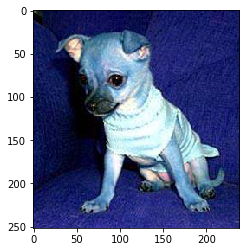

In [16]:
img = cv2.imread('/home/sachin/ML_training/Dog_breed/test/0dac129eab2cf6e788807087e8fbd806.jpg',cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [17]:
def auto_canny(image, sigma=0.33):
    # compute the median of the single channel pixel intensities
    v = np.median(image)
 
    # apply automatic Canny edge detection using the computed median
    lower = int(max(0, (1.0 - sigma) * v))
    upper = int(min(255, (1.0 + sigma) * v))
    edged = cv2.Canny(image, lower, upper)
 
    # return the edged image
    return edged

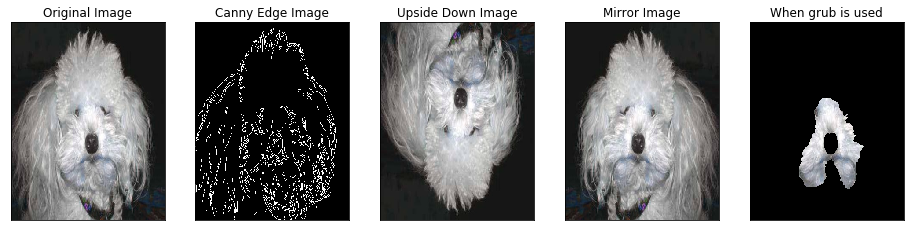

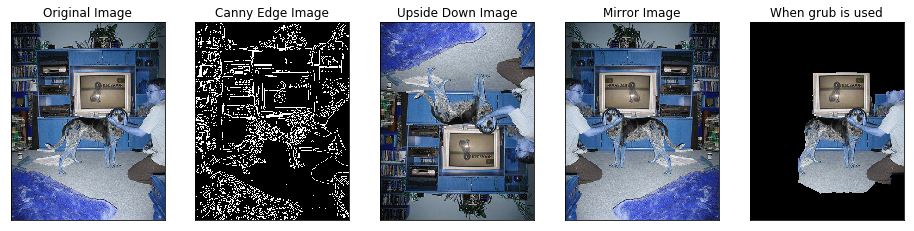

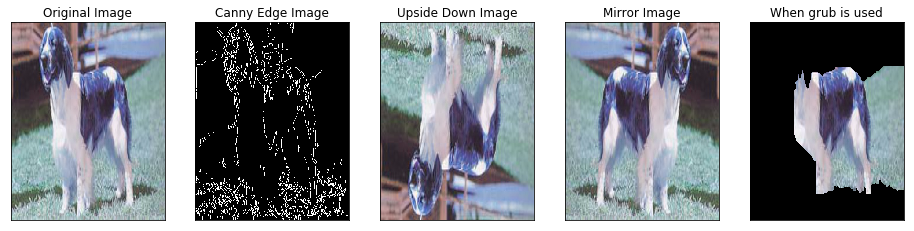

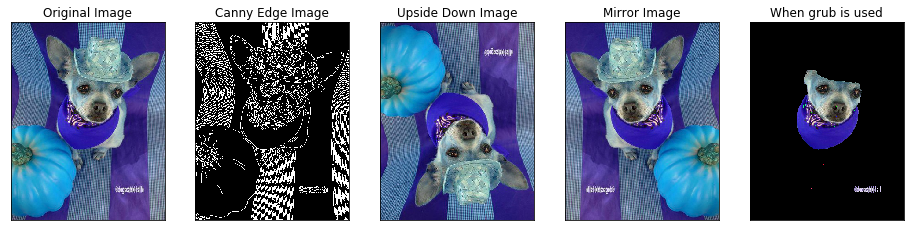

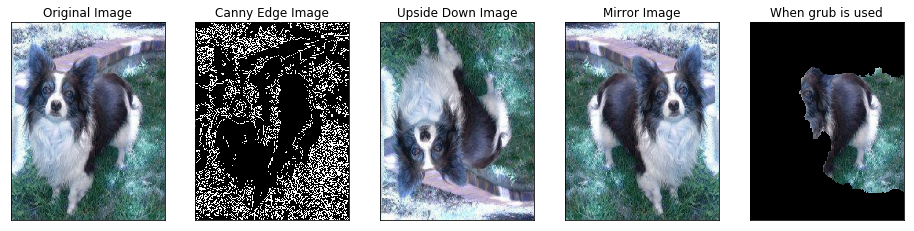

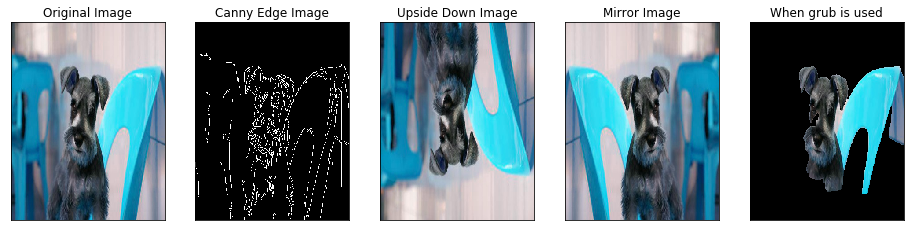

In [13]:
count=0
for img in glob.glob("/home/sachin/ML_training/Dog_breed/resized_images/*.jpg"):
    count=count+1
    if count==7:
        break
    fig=plt.figure(figsize=(16, 16))
    img=cv2.imread(img,cv2.COLOR_BGR2RGB)
    upside_down_img=cv2.flip(img,0)
    canny_edges = cv2.Canny(img,100,200)
    mirror_image=cv2.flip(img,+1)
    plt.subplot(151),plt.imshow(img,cmap = 'gray')
    plt.title('Original Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(152),plt.imshow(canny_edges,cmap = 'gray')
    plt.title('Canny Edge Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(153),plt.imshow(upside_down_img,cmap = 'gray')
    plt.title('Upside Down Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(154),plt.imshow(mirror_image,cmap = 'gray')
    plt.title('Mirror Image'), plt.xticks([]), plt.yticks([])
    
    img2=5*canny_edges.reshape((canny_edges.shape[0],canny_edges.shape[1],1))+img
    mask = np.zeros(img2.shape[:2],np.uint8)
    bgdModel = np.zeros((1,65),np.float64)
    fgdModel = np.zeros((1,65),np.float64)
    rect = (100,100,450,290)
    cv2.grabCut(img2,mask,rect,bgdModel,fgdModel,10,cv2.GC_INIT_WITH_RECT)
    mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
    img2 = img2*mask2[:,:,np.newaxis]
    plt.subplot(155),plt.imshow(img2,cmap = 'gray')
    plt.title('When grub is used'), plt.xticks([]), plt.yticks([])
    
    
    plt.show()

## More techniques can be used to focus on the object in our image(dogs)

(450, 350)


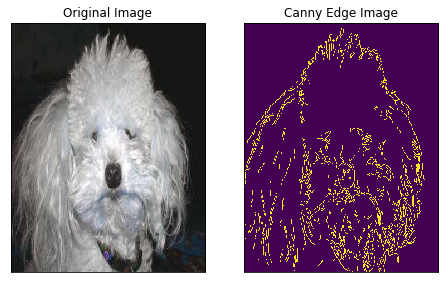

(450, 350)


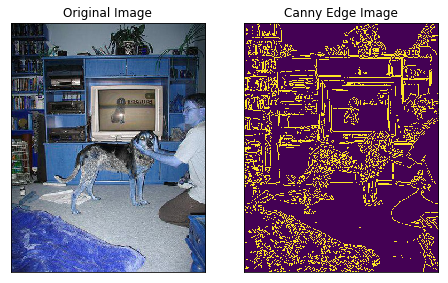

(450, 350)


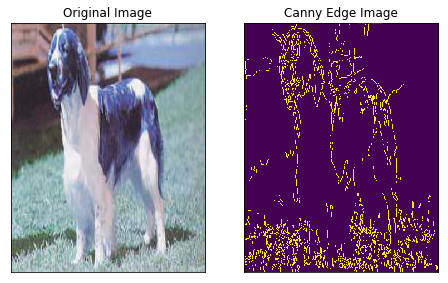

(450, 350)


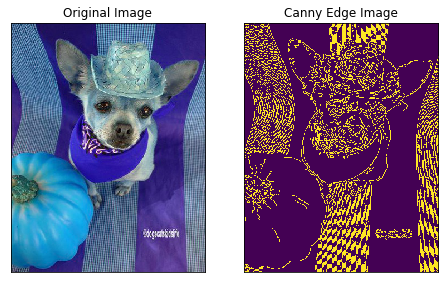

(450, 350)


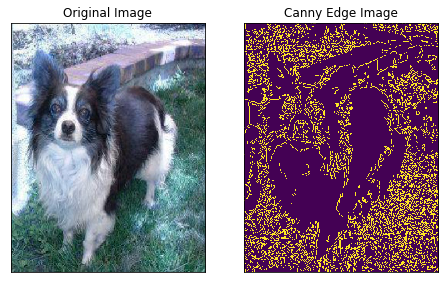

(450, 350)


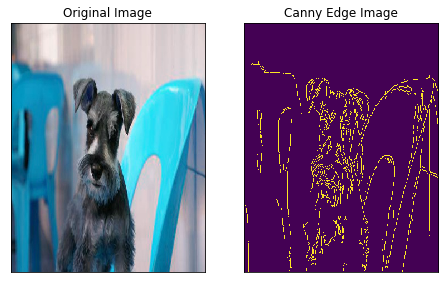

(450, 350)


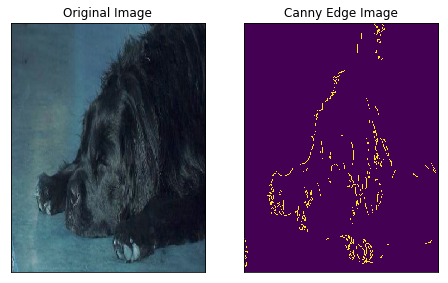

(450, 350)


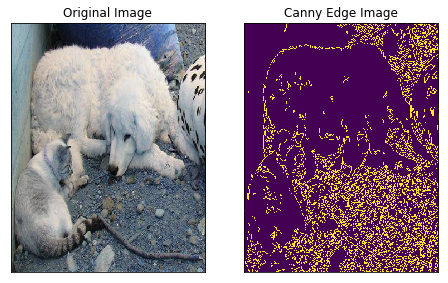

(450, 350)


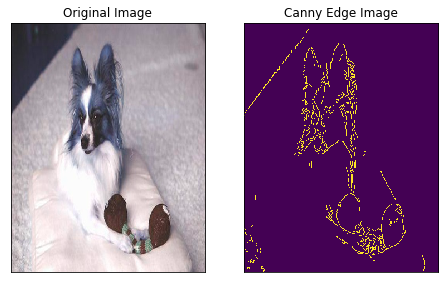

In [9]:
count=0
for img in glob.glob("/home/sachin/ML_training/Dog_breed/resized_images/*.jpg"):
    count=count+1
    if count==10:
        break
    fig=plt.figure(figsize=(16, 16))
    img=cv2.imread(img)
    canny_edges = cv2.Canny(img,100,200)
    canny_edges2=canny_edges.reshape((canny_edges.shape[0],canny_edges.shape[1],1))
    print(canny_edges.shape)
    
    
    plt.subplot(141),plt.imshow(img,cmap = 'gray')
    plt.title('Original Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(142),plt.imshow(canny_edges)
    plt.title('Canny Edge Image'), plt.xticks([]), plt.yticks([])   
    
    plt.show()

## Creating noise that can be added to our model

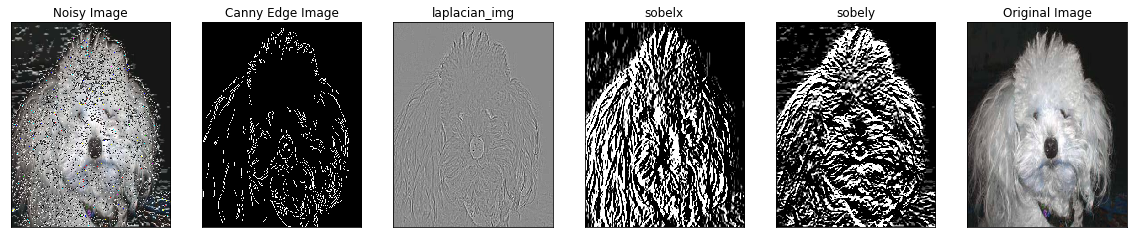

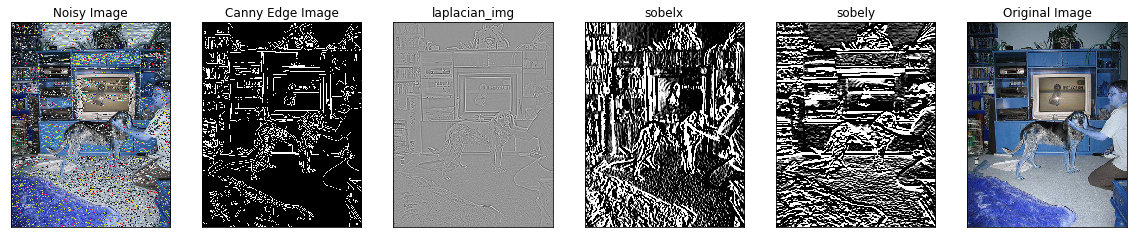

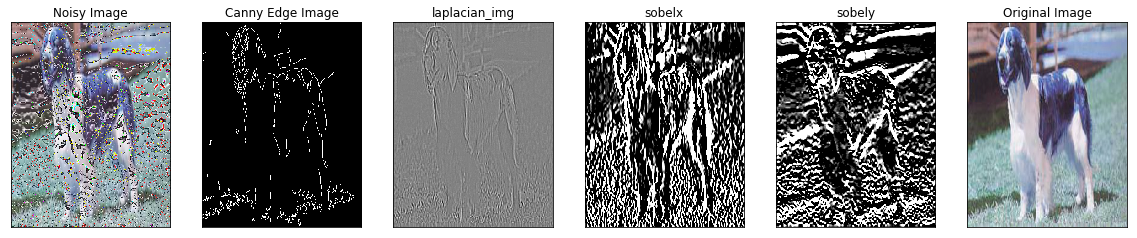

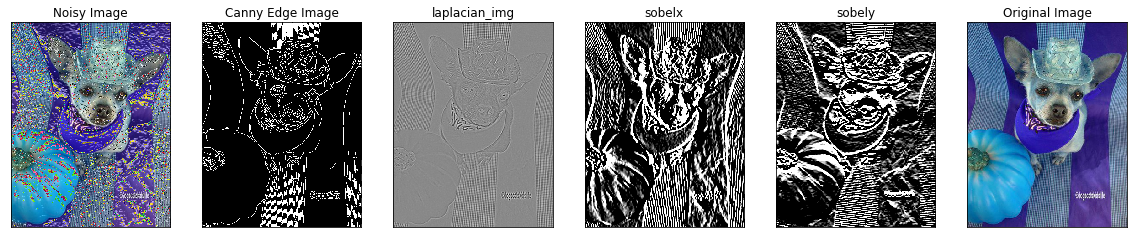

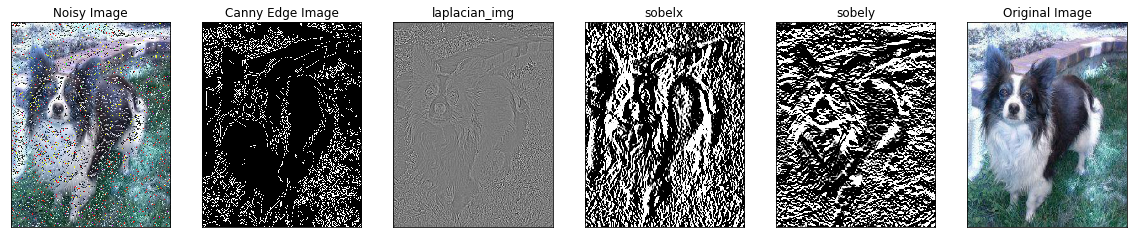

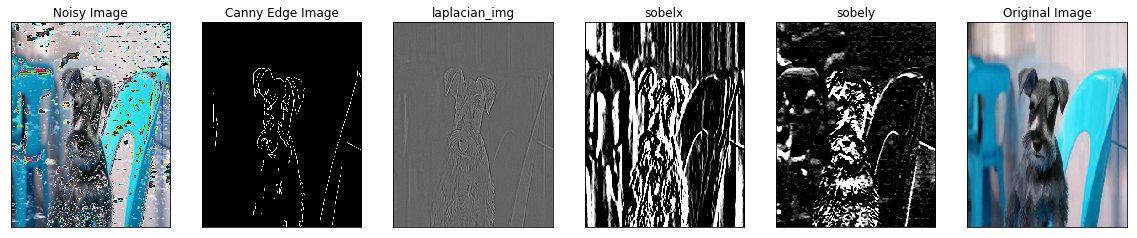

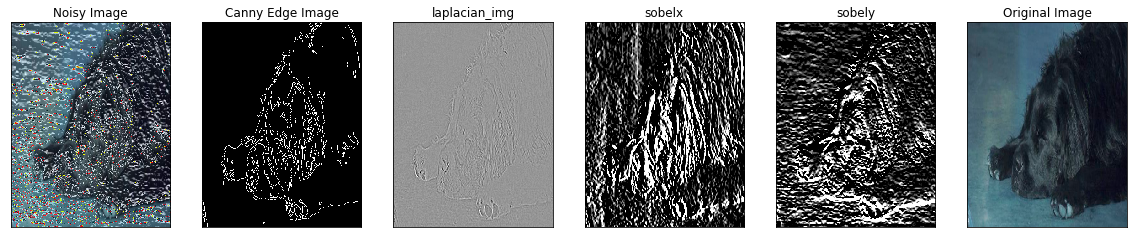

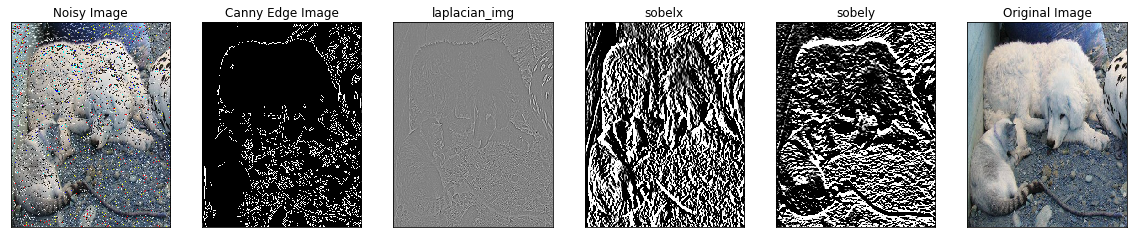

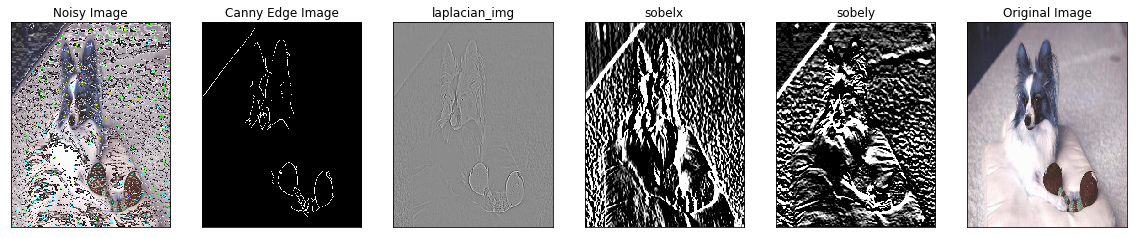

In [10]:

count=0
for image_path in glob.glob("/home/sachin/ML_training/Dog_breed/resized_images/*.jpg"):
    #image_path="/home/sachin/ML_training/Dog_breed/train/02ad779f2721db9364d3bb68f5580582.jpg"
    count=count+1
    if count==10:
        break
    img=cv2.imread(image_path)
    img_org=cv2.imread(image_path)


    # converting to gray scale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # remove noise
    img = cv2.GaussianBlur(gray,(3,3),0)

    #canny_image=auto_canny(img)

    #canny_image=canny_image.reshape((canny_image.shape[0],canny_image.shape[1],1))
    #edge_img=5*canny_image+img
    laplacian_img=cv2.Laplacian(img,cv2.CV_64F)
    sobelx = cv2.Sobel(img,cv2.CV_8U,1,0,ksize=5)  # x
    sobely = cv2.Sobel(img,cv2.CV_8U,0,1,ksize=5)  # y

    fig=plt.figure(figsize=(20, 20))

    noise_mix=img_org+(sobely.reshape(sobely.shape[0],sobely.shape[1],1))
    canny_edges = cv2.Canny(img,100,200)
    plt.subplot(161),plt.imshow(noise_mix,cmap = 'gray')
    plt.title('Noisy Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(162),plt.imshow(auto_canny(img),cmap = 'gray')
    plt.title('Canny Edge Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(163),plt.imshow(laplacian_img,cmap = 'gray')
    plt.title('laplacian_img'), plt.xticks([]), plt.yticks([])
    plt.subplot(164),plt.imshow(sobelx,cmap = 'gray')
    plt.title('sobelx'), plt.xticks([]), plt.yticks([])
    plt.subplot(165),plt.imshow(sobely,cmap = 'gray')
    plt.title('sobely'), plt.xticks([]), plt.yticks([])
    plt.subplot(166),plt.imshow(img_org,cmap = 'gray')
    plt.title('Original Image'), plt.xticks([]), plt.yticks([])
    plt.show()
    #edges=edges.reshape((252,239,1))

## Other things that can be done :
> * Perspective transformation
> * Rotation
> * Adding more noise
> * Using grayscale images
> * Cropped images

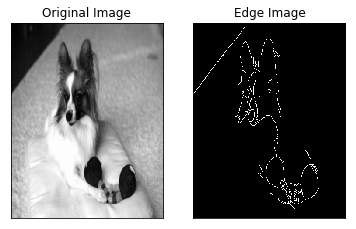

In [11]:
edges2 = cv2.Canny(img,100,200)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges2,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

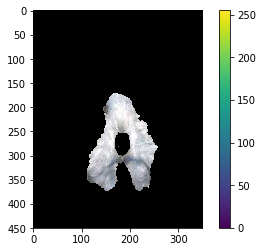

(<matplotlib.image.AxesImage at 0x7f02dc2687b8>,
 None)

In [10]:
img2=img
mask = np.zeros(img2.shape[:2],np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
rect = (100,100,450,290)
cv2.grabCut(img2,mask,rect,bgdModel,fgdModel,10,cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img2 = img2*mask2[:,:,np.newaxis]
plt.imshow(img2),plt.colorbar(),plt.show()

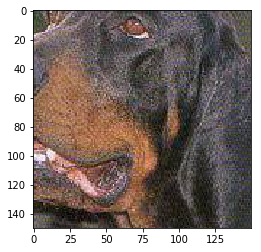

In [91]:
plt.imshow(RGB_img)

In [44]:
file_path="/home/sachin/ML_training/Dog_breed/train/16cc38641158115b57a4610e40e5f6a9.jpg"
img=cv2.imread(file_path)

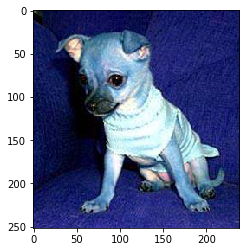

In [59]:
img = cv2.imread('/home/sachin/ML_training/Dog_breed/test/0dac129eab2cf6e788807087e8fbd806.jpg',cv2.COLOR_BGR2RGB)
plt.imshow(img)

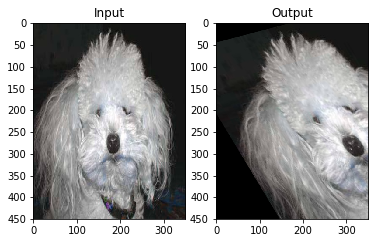

In [11]:
rows,cols,ch = img.shape

pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])

M = cv2.getAffineTransform(pts1,pts2)

dst = cv2.warpAffine(img,M,(cols,rows))

plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

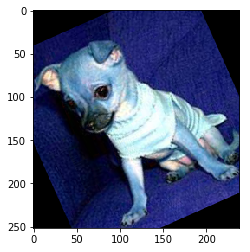

In [12]:
def rotateImage(image, angle):
  image_center = tuple(np.array(image.shape[1::-1]) / 2)
  rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
  result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR)
  return result

img = cv2.imread('/home/sachin/ML_training/Dog_breed/test/0dac129eab2cf6e788807087e8fbd806.jpg',cv2.COLOR_BGR2RGB)
img_rotate=rotateImage(img,24)
plt.imshow(img_rotate)

(<matplotlib.axes._subplots.AxesSubplot at 0x7f4f7d105748>,
 Text(0.5,1,'Cropped Image'))

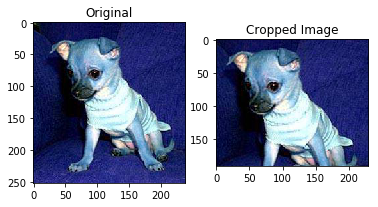

In [67]:
image_crop=img[10:200, 10:240]

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.subplot(122),plt.imshow(image_crop),plt.title('Cropped Image')